In [40]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import igviz as ig

edges = pd.read_csv('gephi_edges.csv')
edges = edges.dropna()
edges['target'] = edges['target'].astype('int')
edges['week_read'] = edges['week_read'].astype('int')
edges['source'] = edges['source'].astype('int')
#print(edges['source'].unique())
#print(edges['target'].unique())
print(edges['semester'].unique())

['Fall 2021' 'Spring 2020' 'Spring 2021' 'Fall 2020' 'Summer 2021'
 'Fall 2019' 'Summer 2020' 'Spring 2022']


In [41]:
node_colors = {'Fall 2019': 'red', 'Fall 2020': 'blue', 'Fall 2021': 'green', 'Spring 2020': 'mediumorchid', 'Spring 2021': 'gold', 'Spring 2022': 'magenta', 'Summer 2020': 'brown', 'Summer 2021': 'purple', 'all': 'lavender'}
#edges['color'] = edges['semester'].map(node_colors)
nodes = pd.read_csv('node_list.csv', header=0)
nodes['id'] = nodes['id'].astype('int')
nodes = nodes.dropna()
nodes['color'] = nodes['semester'].map(node_colors)
#print(nodes['color'].unique())
#print(nodes['semester'].unique())
#print(nodes['color'].unique)
#print(nodes.iloc[395])
#print(nodes)
duplicate_rows = nodes[nodes.duplicated()]
print(duplicate_rows)


Empty DataFrame
Columns: [id, name, semester, color]
Index: []


In [72]:
G = nx.from_pandas_edgelist(edges, source='source', target='target')
pos = nx.random_layout(G)
nx.set_node_attributes(G, pd.Series(nodes.id, index=nodes.id).to_dict(), 'id')
nx.set_node_attributes(G, pd.Series(nodes.semester, index=nodes.id).to_dict(), 'semester')
nx.set_node_attributes(G, pd.Series(nodes.color, index=nodes.id).to_dict(), 'color')
#G.remove_node(396)
#print(G.nodes._nodes)
attrs = {396: {'id': 396, 'semester': 'Spring 2022', 'color': 'magenta'}}
nx.set_node_attributes(G, attrs)
G.nodes[396]
#color = nx.get_node_attributes(G, 'color')
#print(color)

{'id': 396, 'semester': 'Spring 2022', 'color': 'magenta'}

In [73]:
print(sorted(G.nodes))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 156, 157, 158, 160, 161, 162, 165, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 236, 237, 23

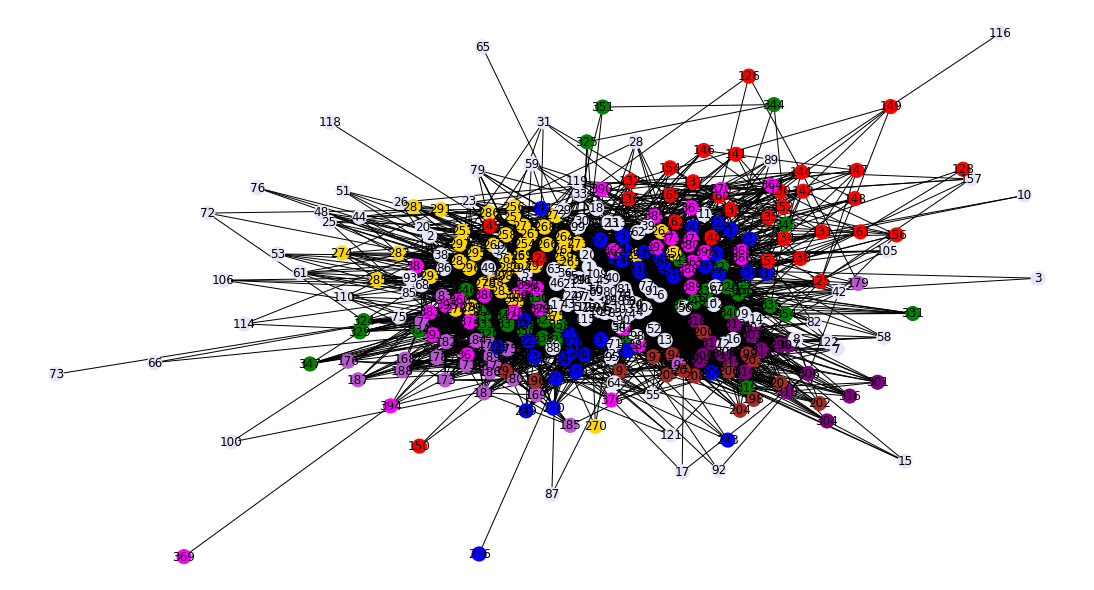

In [74]:
colors = [u[1] for u in G.nodes(data='color')]

plt.figure(figsize=(15, 8))
nx.draw(G,
    node_size=200,
    node_color=colors,
    with_labels=True)
plt.show()

In [75]:
import igviz as ig

In [78]:
ig.plot(G,
title="Weird Fiction Discussion Board Visualization",
layout='kamada',
node_text=['semester'])